In [51]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
from gpt.gpt import GPT

In [88]:
import sys, os
root = os.path.join(os.getcwd(), '../')
INPUT_FILE = os.path.join(root,'templates/dcgun/gpt.in')
sys.path.append(root)

G = GPT(input_file=INPUT_FILE,
        workdir=os.path.join(root,'devel/test'))


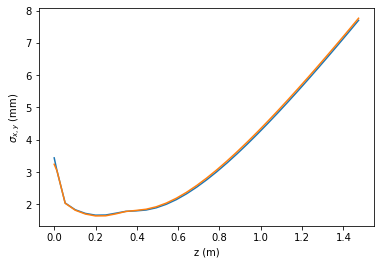

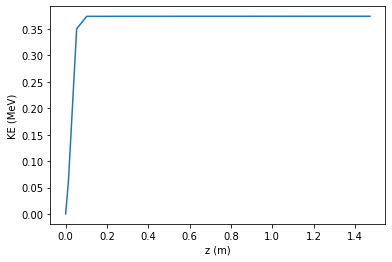

In [90]:
# Run GPT with some new settings:
from matplotlib import pyplot as plt

G.set_variables({'gun_voltage':375,'sol_1_current':-3})
G.run()

zavg = [tout['z'].mean() for tout in G.tout] 
xstd = [1000*tout['x'].std() for tout in G.tout] 
ystd = [1000*tout['y'].std() for tout in G.tout] 
avgKE = [0.51*(tout['G'].mean()-1) for tout in G.tout] 

plt.figure()
plt.plot(zavg,xstd, zavg,ystd)
plt.xlabel('z (m)')
plt.ylabel('$\sigma_{x,y}$ (mm)')

plt.figure()
plt.plot(zavg,avgKE)
plt.xlabel('z (m)')
plt.ylabel('KE (MeV)')
plt.show()